### Student Information
Name:林彥寬

Student ID:114232505

GitHub ID:brandonlin991118

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_colwidth", 140)
pd.set_option("display.max_rows", 30)


In [7]:
def _pick_col(cols, wanted):
    wanted = [w.lower() for w in wanted]
    for c in cols:
        lc = c.lower()
        if lc in wanted or any(w in lc for w in wanted):
            return c
    raise KeyError(f"Could not find any of {wanted} in {list(cols)}")

root = Path.cwd()
data_dir = root / "newdataset"

candidates = []
if data_dir.exists():
    candidates = list(data_dir.glob("**/*stock*sentiment*.csv"))
    if not candidates:
        candidates = list(data_dir.glob("**/*.csv"))
if not candidates:
    candidates = list(root.glob("**/newdataset/**/*.csv"))

if not candidates:
    raise FileNotFoundError("No CSV found under newdataset/. Please place the new CSV there.")

data_path = sorted(candidates)[0]
print(f"Using dataset: {data_path}")

df = pd.read_csv(data_path)
display(df.head())



Using dataset: c:\Users\Brandon\Documents\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comments/165kllm/who_knows_more_vmar/,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkab...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', 'Marine', 'Main', 'Systems', 'Vision Marine Technologies Inc.', 'Vision', 'water', 'record...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping to call Trump quickly.,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/trump-xi-china-tariffs/index.html,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


Text(0.5, 0.98, '')

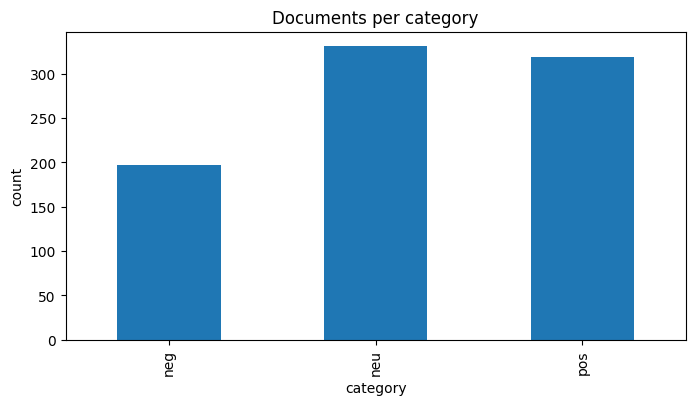

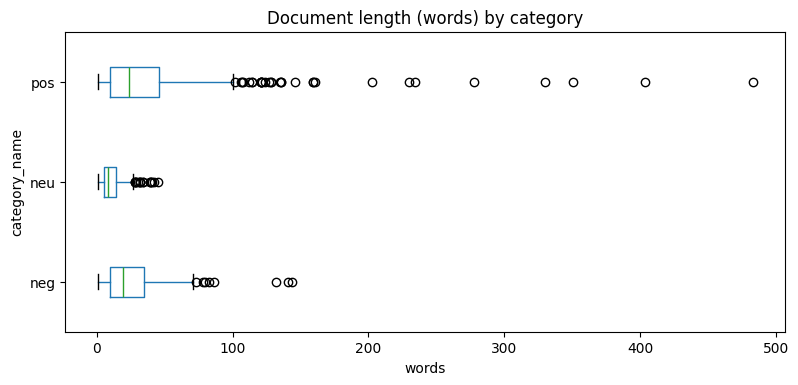

In [9]:
# Class balance
ax = X['category_name'].value_counts().sort_index().plot(
    kind='bar', figsize=(8,4), title='Documents per category'
)
ax.set_xlabel('category'); ax.set_ylabel('count')
# Simple token/word length (fast and robust)
X['n_words'] = X['text'].str.split().str.len()

# Boxplot per category
ax = X.boxplot(column='n_words', by='category_name', grid=False, vert=False, figsize=(9,4))
ax.set_title('Document length (words) by category'); ax.set_xlabel('words'); 
ax.figure.suptitle('')



In [8]:
text_col  = _pick_col(df.columns, ["text"])
label_col = _pick_col(df.columns, ["label", "sentiment", "target"])

X = (
    df[[text_col, label_col]]
    .rename(columns={text_col: "text", label_col: "label"})
    .dropna(subset=["text", "label"])
    .copy()
)

label_map = {-1.0: "neg", 0.0: "neu", 1.0: "pos", -1: "neg", 0: "neu", 1: "pos"}
X["category_name"] = X["label"].map(label_map).fillna(X["label"].astype(str))

display(X.head(3)[["text", "category_name"]])
print("Class counts:\n", X["category_name"].value_counts())


,text,category_name
0,Calls on retards,neg
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,pos
2,Seeing lots of red in the ticker.,neu


Class counts:
 category_name
neu    331
pos    319
neg    197
Name: count, dtype: int64


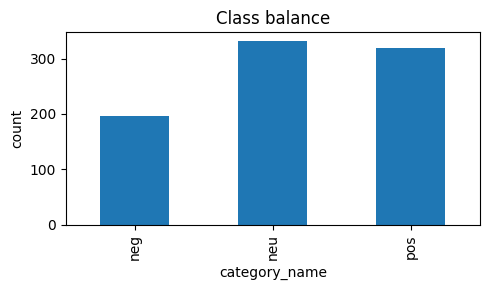

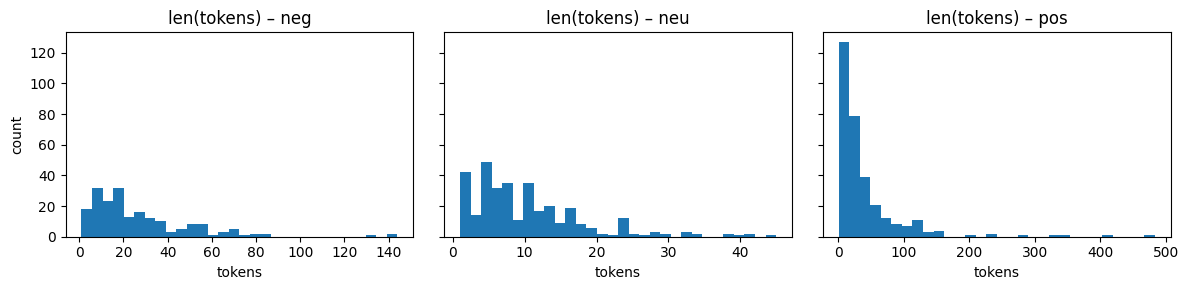

In [10]:
# Class balance
plt.figure(figsize=(5,3))
X["category_name"].value_counts().sort_index().plot(kind="bar")
plt.title("Class balance")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Token lengths per class
X["n_tokens"] = X["text"].str.split().str.len().fillna(0).astype(int)
labels = sorted(X["category_name"].unique())

fig, axes = plt.subplots(1, len(labels), figsize=(12,3), sharey=True)
for ax, lab in zip(np.ravel(axes), labels):
    ax.hist(X.loc[X["category_name"]==lab, "n_tokens"], bins=30)
    ax.set_title(f"len(tokens) – {lab}")
    ax.set_xlabel("tokens")
axes[0].set_ylabel("count")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", min_df=5, max_df=0.5)
X_tfidf = tfidf.fit_transform(X["text"])
terms = np.array(tfidf.get_feature_names_out())

def top_terms_for(label, k=10):
    mask = (X["category_name"] == label).to_numpy()
    mean_tfidf = np.asarray(X_tfidf[mask].mean(axis=0)).ravel()
    idx = mean_tfidf.argsort()[-k:][::-1]
    return terms[idx], mean_tfidf[idx]


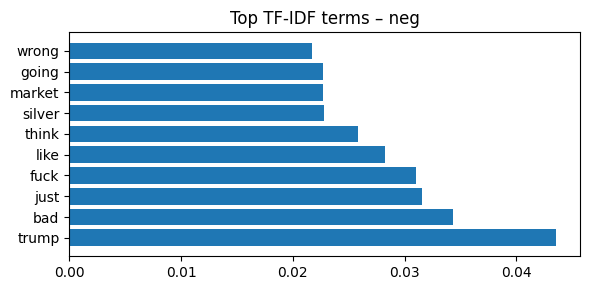

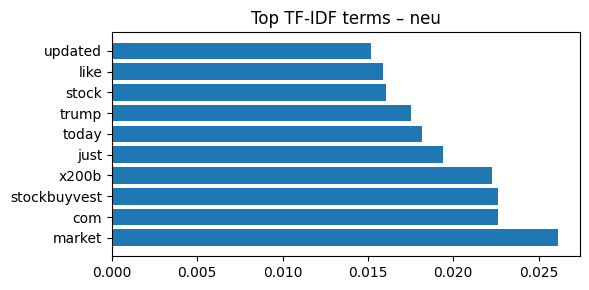

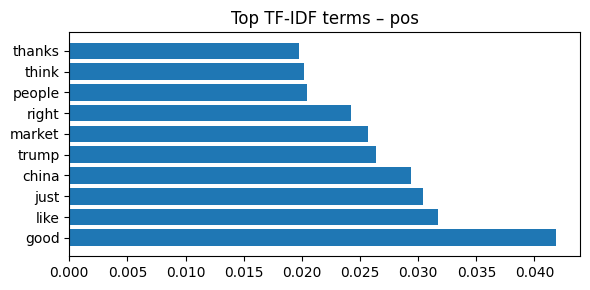

In [12]:
for lab in labels:
    tt, vals = top_terms_for(lab, k=10)
    plt.figure(figsize=(6,3))
    y = np.arange(len(tt))[::-1]
    plt.barh(y, vals[::-1])
    plt.yticks(y, tt[::-1])
    plt.title(f"Top TF-IDF terms – {lab}")
    plt.tight_layout()
    plt.show()


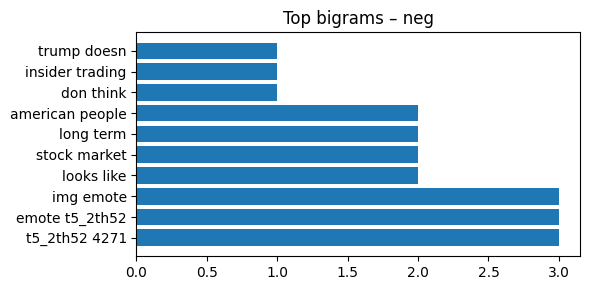

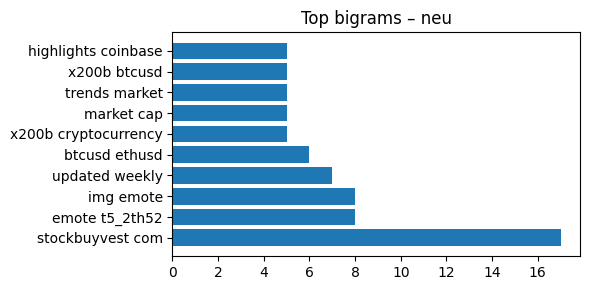

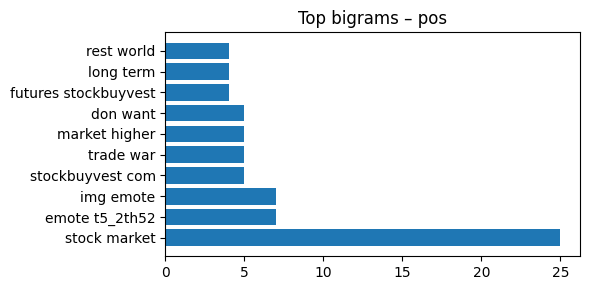

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

bi = CountVectorizer(ngram_range=(2,2), stop_words="english", min_df=5, max_df=0.5)
X_bi = bi.fit_transform(X["text"])
bigrams = np.array(bi.get_feature_names_out())

def top_bigrams_for(label, k=10):
    mask = (X["category_name"] == label).to_numpy()
    counts = np.asarray(X_bi[mask].sum(axis=0)).ravel()
    idx = counts.argsort()[-k:][::-1]
    return bigrams[idx], counts[idx]

for lab in labels:
    tt, vals = top_bigrams_for(lab, k=10)
    plt.figure(figsize=(6,3))
    y = np.arange(len(tt))[::-1]
    plt.barh(y, vals[::-1])
    plt.yticks(y, tt[::-1])
    plt.title(f"Top bigrams – {lab}")
    plt.tight_layout()
    plt.show()


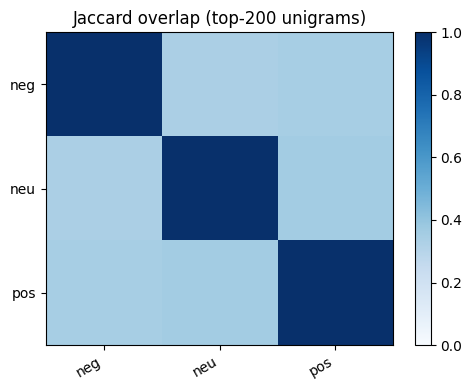

In [14]:
# Build set of top N unigrams per class using TF-IDF means
N = 200
def top_unigram_set(label, N=200):
    mask = (X["category_name"] == label).to_numpy()
    mean_tfidf = np.asarray(X_tfidf[mask].mean(axis=0)).ravel()
    idx = mean_tfidf.argsort()[-N:][::-1]
    return set(terms[idx])

top_sets = {lab: top_unigram_set(lab, N=N) for lab in labels}

def jacc(a, b):
    return len(a & b) / len(a | b) if (a | b) else 0.0

mat = []
for a in labels:
    row = []
    for b in labels:
        row.append(jacc(top_sets[a], top_sets[b]))
    mat.append(row)

overlap = pd.DataFrame(mat, index=labels, columns=labels)

# Use matplotlib imshow (not pandas .plot(kind='imshow'), which is invalid)
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(overlap.values, cmap='Blues', aspect='auto', vmin=0, vmax=1)
ax.set_title(f'Jaccard overlap (top-{N} unigrams)')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


# Phase 2

In [3]:
# --- Robust data-path setup (works on Windows/Mac/Linux) ---
from pathlib import Path
import os, glob
import pandas as pd

# The data folder in your repo (as shown in your screenshot)
DATA_DIR = Path("newdataset")            # relative to the notebook location
assert DATA_DIR.exists(), f"Could not find {DATA_DIR.resolve()}"

# Decide how to load:
# - If the folder contains class subfolders, we load from folders.
# - If it just contains CSV files, we load from the CSV(s).
LOAD_FROM_FOLDER = any((DATA_DIR / d).is_dir() for d in os.listdir(DATA_DIR))
CSV_FILES = list(DATA_DIR.glob("*.csv"))  # e.g., Reddit-stock-sentiment.csv

def load_from_folder(root: Path):
    rows = []
    classes = sorted([d for d in os.listdir(root) if (root / d).is_dir()])
    for c in classes:
        for fp in glob.glob(str((root / c / "**" / "*.*").resolve()), recursive=True):
            try:
                with open(fp, "r", encoding="utf-8", errors="ignore") as f:
                    txt = f.read()
                rows.append({"text": txt, "category": c, "category_name": c})
            except Exception:
                # Skip unreadable files
                pass
    return pd.DataFrame(rows)

def load_from_csv_one(fp: Path, text_col="text", label=None):
    df = pd.read_csv(fp)
    if label is not None and "category_name" not in df.columns:
        df["category_name"] = label
    if "category" not in df.columns and "category_name" in df.columns:
        # Map text label to an integer (stable order)
        lab2id = {lab: i for i, lab in enumerate(sorted(df["category_name"].unique()))}
        df["category"] = df["category_name"].map(lab2id)
    return df

def load_from_csv_many(csv_files):
    # If you have multiple CSVs (one per class), label from filename
    frames = []
    for fp in csv_files:
        # infer simple label from filename; adjust as needed
        label = fp.stem
        frames.append(load_from_csv_one(fp, label=label))
    return pd.concat(frames, ignore_index=True)

# ---- Load X dataframe ----
if LOAD_FROM_FOLDER:
    print(f"Loading from folders under: {DATA_DIR.resolve()}")
    X = load_from_folder(DATA_DIR)
elif len(CSV_FILES) == 1:
    print(f"Loading from single CSV: {CSV_FILES[0].name}")
    X = load_from_csv_one(CSV_FILES[0])
elif len(CSV_FILES) > 1:
    print(f"Loading from {len(CSV_FILES)} CSV files in {DATA_DIR.name}")
    X = load_from_csv_many(CSV_FILES)
else:
    raise FileNotFoundError(
        f"No subfolders and no CSVs found under {DATA_DIR.resolve()}.\n"
        f"Put your new dataset under 'newdataset/'."
    )

print(X.shape)
X.head()


Loading from single CSV: Reddit-stock-sentiment.csv
(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# 1) Build a sanitized tokenized bag of words for itemset mining & classic counts
#    (You can tweak stop_words/min_df/max_df here)
count_vect = CountVectorizer(lowercase=True, stop_words="english", min_df=3)
tdm = count_vect.fit_transform(X["text"])
tdm_df = pd.DataFrame.sparse.from_spmatrix(tdm, columns=count_vect.get_feature_names_out(), index=X.index)

# 2) Try mlxtend Apriori/FP-Growth for real pattern mining. Fallback to top n-grams.
frequent_patterns = []
try:
    from mlxtend.frequent_patterns import apriori # or fpgrowth
    tdm_bool = (tdm_df > 0).astype(int)
    MIN_SUP  = 0.01   # tune if too many/few patterns
    MAX_LEN  = 3
    itemsets = apriori(tdm_bool, min_support=MIN_SUP, use_colnames=True, max_len=MAX_LEN)
    itemsets["length"] = itemsets["itemsets"].apply(len)
    multiword = itemsets.query("length >= 2").sort_values("support", ascending=False)
    TOP_N_PATTERNS = 800
    multiword = multiword.head(TOP_N_PATTERNS).reset_index(drop=True)
    frequent_patterns = [tuple(s) for s in multiword["itemsets"]]
    print(f"Apriori produced: total={len(itemsets)} | multiword={len(frequent_patterns)}")
except Exception as e:
    print("mlxtend unavailable or failed:", e)
    print("Fallback: take strong n-grams as 'patterns'")
    # fallback: use top bigrams as pseudo-patterns
    bi_vect = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(2,2), min_df=5)
    bi = bi_vect.fit_transform(X["text"])
    bi_sum = bi.sum(axis=0).A1
    vocab = bi_vect.get_feature_names_out()
    pairs = list(zip(vocab, bi_sum))
    pairs.sort(key=lambda x: x[1], reverse=True)
    TOP_N_PATTERNS = 800
    frequent_patterns = [tuple(p[0].split()) for p in pairs[:TOP_N_PATTERNS]]
    print(f"Pseudo-patterns (top bigrams): {len(frequent_patterns)}")

# 3) Turn patterns into a binary matrix (presence/absence)
def contains_all(words, doc_tokens_set):
    return all(w in doc_tokens_set for w in words)

# Pre-tokenize to sets for fast membership
token_sets = []
vocab_index = {w:i for i,w in enumerate(count_vect.get_feature_names_out())}
for r in tdm:
    # Indices of tokens present in this doc
    idxs = r.nonzero()[1]
    token_sets.append(set(count_vect.get_feature_names_out()[idxs]))

cols = ["pat:"+"_".join(p) for p in frequent_patterns]
pattern_matrix = pd.DataFrame(
    [[1 if contains_all(p, ts) else 0 for p in frequent_patterns] for ts in token_sets],
    columns=cols, index=X.index
).astype("int8")

print("pattern_matrix:", pattern_matrix.shape)
pattern_matrix.head()


mlxtend unavailable or failed: No module named 'mlxtend'
Fallback: take strong n-grams as 'patterns'
Pseudo-patterns (top bigrams): 33
pattern_matrix: (847, 33)


,pat:stock_market,pat:stockbuyvest_com,pat:emote_t5_2th52,pat:img_emote,pat:bond_market,pat:t5_2th52_4271,pat:updated_weekly,pat:btcusd_ethusd,pat:don_think,pat:insider_trading,...,pat:highlights_coinbase,pat:jasmyusd_pepeusd,pat:market_cap,pat:market_higher,pat:prices_charts,pat:rest_world,pat:trends_market,pat:trump_doesn,pat:x200b_btcusd,pat:x200b_cryptocurrency
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, stop_words="english", min_df=3)
X_tfidf = tfidf.fit_transform(X["text"])
print("TFIDF:", X_tfidf.shape)


TFIDF: (847, 904)


In [10]:
print("Columns in X:")
print(X.columns.tolist())
print("\nSample rows:")
print(X.head(3))


Columns in X:
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

Sample rows:
      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https:

In [11]:
# --- Fix label column so it works downstream ---
import pandas as pd

if 'category' not in X.columns:
    # Try common label names and convert them to 'category'
    possible = [c for c in X.columns if any(k in c.lower() for k in ['label','target','class','sentiment','category','topic'])]
    if possible:
        label_col = possible[0]
        print(f"Renaming '{label_col}' → 'category'")
        X = X.rename(columns={label_col: 'category'})
    else:
        raise KeyError("No column found for labels. Check your dataset columns.")

# If labels are text, convert to numeric codes (required for stratify)
if not pd.api.types.is_numeric_dtype(X['category']):
    X['category'] = X['category'].astype('category').cat.codes

print("✅ 'category' column ready:", X['category'].unique())


Renaming 'sentiment' → 'category'
✅ 'category' column ready: [-1.  1.  0.]


In [12]:
from sklearn.model_selection import train_test_split

y = X["category"].values
# classic count features
X_count_train, X_count_test, y_train, y_test = train_test_split(
    tdm, y, test_size=0.30, random_state=42, stratify=y
)
# TF-IDF features
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf, y, test_size=0.30, random_state=42, stratify=y
)
# Patterns (as dense is fine, it's small)
X_pat_train, X_pat_test, _, _ = train_test_split(
    pattern_matrix.values, y, test_size=0.30, random_state=42, stratify=y
)

print("Split OK:", X_count_train.shape, X_tfidf_train.shape, X_pat_train.shape)


Split OK: (592, 904) (592, 904) (592, 33)


In [13]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

# MultinomialNB usually works well on term counts
nb_count = MultinomialNB()
nb_count.fit(X_count_train, y_train)
pred_count = nb_count.predict(X_count_test)
acc_count = accuracy_score(y_test, pred_count)

# TF-IDF often benefits from ComplementNB (handles imbalanced features better)
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_tfidf_train, y_train)
pred_tfidf = nb_tfidf.predict(X_tfidf_test)
acc_tfidf = accuracy_score(y_test, pred_tfidf)

print(f"[NB] Accuracy (Count): {acc_count:.4f}")
print(classification_report(y_test, pred_count, target_names=[k for k,_ in sorted(cat2id.items(), key=lambda x:x[1])]))
print(f"[NB] Accuracy (TF-IDF): {acc_tfidf:.4f}")
print(classification_report(y_test, pred_tfidf, target_names=[k for k,_ in sorted(cat2id.items(), key=lambda x:x[1])]))


[NB] Accuracy (Count): 0.5647


NameError: name 'cat2id' is not defined

In [8]:
import numpy as np
from scipy.sparse import hstack, csr_matrix

# Augment COUNT features with pattern presence
X_aug_train = hstack([X_count_train, csr_matrix(X_pat_train)], format="csr")
X_aug_test  = hstack([X_count_test,  csr_matrix(X_pat_test)],  format="csr")

nb_aug = MultinomialNB()
nb_aug.fit(X_aug_train, y_train)
pred_aug = nb_aug.predict(X_aug_test)
acc_aug = accuracy_score(y_test, pred_aug)

print(f"[NB] Accuracy (Count):      {acc_count:.4f}")
print(f"[NB] Accuracy (TF-IDF):     {acc_tfidf:.4f}")
print(f"[NB] Accuracy (Augmented):  {acc_aug:.4f}")
print("Δ Augmented - Count =", round(acc_aug - acc_count, 4))


NameError: name 'X_count_train' is not defined

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_count = DecisionTreeClassifier(random_state=42)
dt_count.fit(X_count_train, y_train)
pred_dt_count = dt_count.predict(X_count_test)
acc_dt_count = accuracy_score(y_test, pred_dt_count)

dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_aug_train, y_train)
pred_dt_aug = dt_aug.predict(X_aug_test)
acc_dt_aug = accuracy_score(y_test, pred_dt_aug)

print(f"[DecisionTree] Acc (Count):     {acc_dt_count:.4f}")
print(f"[DecisionTree] Acc (Augmented): {acc_dt_aug:.4f}")
print("Δ Augmented - Count =", round(acc_dt_aug - acc_dt_count, 4))


NameError: name 'X_count_train' is not defined